In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 999

# GDP per capita

In [2]:
# Read data from csv files
df_gdp_per_cap = pd.read_csv('gdp_per_country.csv')
df_gdp_per_cap.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,23512.602600,24985.993280,24713.698050,26189.435510,26647.938100,27980.880700,28281.350480,29007.693000,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,...,543.303042,591.162759,641.871479,637.165523,613.856689,578.466353,547.228110,556.302002,524.162881,502.115487
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3289.646664,2973.591160
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4094.350334,4437.142885,4247.629984,4413.060861,4578.631994,3952.801215,4124.055726,4531.020806,5284.380184,5352.857411
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,40852.666780,43335.328860,38686.461260,39538.766720,41303.929370,35762.523070,37474.665410,38962.880350,41793.055260,40886.391160


In [3]:
# Drop unnecessary colums
df_gdp_per_cap = df_gdp_per_cap.iloc[:,[0,1,-2]]
df_gdp_per_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  264 non-null    object 
 1   Country Code  264 non-null    object 
 2   2018          241 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.3+ KB


In [4]:
# Rename columns
df_gdp_per_cap.rename(columns={'2018': '2018 gdp per capita'}, inplace=True)
df_gdp_per_cap.head()

,Country Name,Country Code,2018 gdp per capita
0,Aruba,ABW,NaN
1,Afghanistan,AFG,524.162881
2,Angola,AGO,3289.646664
3,Albania,ALB,5284.380184
4,Andorra,AND,41793.055260


In [5]:
# Drop rows
df_gdp_per_cap = df_gdp_per_cap.dropna()
df_gdp_per_cap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 1 to 263
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country Name         241 non-null    object 
 1   Country Code         241 non-null    object 
 2   2018 gdp per capita  241 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.5+ KB


In [6]:
# Sort dataframe by gdp per capita
df_gdp_per_cap.sort_values(by=['2018 gdp per capita'], ascending=False).head()

,Country Name,Country Code,2018 gdp per capita
147,Monaco,MCO,185829.01800
142,Luxembourg,LUX,116654.26110
144,"Macao SAR, China",MAC,87208.53591
50,Cayman Islands,CYM,85477.28701
35,Switzerland,CHE,82818.10816


In [7]:
# Get list of countries and regions from metadata
df_gdp_per_cap_regions = pd.read_csv('gdp_per_country_metadata.csv')
df_gdp_per_cap_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  263 non-null    object
 1   Region        217 non-null    object
 2   IncomeGroup   217 non-null    object
 3   SpecialNotes  94 non-null     object
 4   TableName     263 non-null    object
dtypes: object(5)
memory usage: 10.4+ KB


In [8]:
# Drop rows that are empty in 'Region' column
df_gdp_per_cap_regions = df_gdp_per_cap_regions.dropna(subset=['Region'])
df_gdp_per_cap_regions.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra


In [9]:
# Delete all columns except 'Country Code'
df_gdp_per_cap_regions = df_gdp_per_cap_regions['Country Code']

In [10]:
df_gdp_per_cap_regions.head()

0    ABW
1    AFG
2    AGO
3    ALB
4    AND
Name: Country Code, dtype: object

In [11]:
# Inner merge to eliminate unnecessary country codes
df_gdp_per_cap = df_gdp_per_cap.merge(df_gdp_per_cap_regions, on='Country Code', how='inner')

In [12]:
df_gdp_per_cap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country Name         197 non-null    object 
 1   Country Code         197 non-null    object 
 2   2018 gdp per capita  197 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.2+ KB


# Tourists per capita

In [13]:
# Read data from csv files
df_pop = pd.read_csv('population.csv', skiprows=3)
df_tourists = pd.read_csv('arrivals.csv', skiprows=3)

In [14]:
df_pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN


In [15]:
df_tourists.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,869000.0,904000.0,979000.0,1072000.0,1225000.0,1102000.0,1070500.0,1082000.0,NaN,NaN
1,Afghanistan,AFG,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,481000.0,528000.0,650000.0,595000.0,592000.0,397000.0,261000.0,218000.0,NaN,NaN
3,Albania,ALB,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,2469000.0,3156000.0,2857000.0,3341000.0,3784000.0,4070000.0,4643000.0,5340000.0,NaN,NaN
4,Andorra,AND,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,2242000.0,2238000.0,2328000.0,2363000.0,2663000.0,2819000.0,3003000.0,3042000.0,NaN,NaN


In [16]:
# Delete unnecessary columns
df_tourists = df_tourists.iloc[:,[0,1,-3]]
df_pop = df_pop.iloc[:,[0,1,-3]]

In [17]:
df_tourists.head()

,Country Name,Country Code,2018
0,Aruba,ABW,1082000.0
1,Afghanistan,AFG,NaN
2,Angola,AGO,218000.0
3,Albania,ALB,5340000.0
4,Andorra,AND,3042000.0


In [18]:
df_pop.head()

,Country Name,Country Code,2018
0,Aruba,ABW,105845.0
1,Afghanistan,AFG,37172386.0
2,Angola,AGO,30809762.0
3,Albania,ALB,2866376.0
4,Andorra,AND,77006.0


In [19]:
# Rename columns
df_tourists.rename(columns={'2018': 'tourists_2018'}, inplace=True)
df_pop.rename(columns={'2018': 'pop_2018'}, inplace=True)

# Merge dataframes
df_tourists_per_cap = pd.merge(df_tourists, df_pop)

# Drop rows
df_tourists_per_cap = df_tourists_per_cap.dropna()

In [20]:
df_tourists_per_cap.head()

,Country Name,Country Code,tourists_2018,pop_2018
0,Aruba,ABW,1.082000e+06,105845.0
2,Angola,AGO,2.180000e+05,30809762.0
3,Albania,ALB,5.340000e+06,2866376.0
4,Andorra,AND,3.042000e+06,77006.0
5,Arab World,ARB,1.014637e+08,419790591.0


In [21]:
# Read country metadata from metadata file
df_tourist_meta = pd.read_csv('arrivals_metadata.csv')

In [22]:
# Drop rows that are empty in 'Region' column
df_tourist_meta = df_tourist_meta.dropna(subset=['Region'])

In [23]:
# Delete all columns except 'Country Code'
df_tourist_meta = df_tourist_meta['Country Code']

In [24]:
# Inner merge to eliminate unnecessary country codes
df_tourists_per_cap = df_tourists_per_cap.merge(df_tourist_meta, on='Country Code', how='inner')

In [25]:
df_tourists_per_cap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   174 non-null    object 
 1   Country Code   174 non-null    object 
 2   tourists_2018  174 non-null    float64
 3   pop_2018       174 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.8+ KB


In [26]:
# Add column
df_tourists_per_cap['tourists_per_capita'] = df_tourists_per_cap['tourists_2018']/df_tourists_per_cap['pop_2018']

In [27]:
# Sort dataframe
df_tourists_per_cap = df_tourists_per_cap.sort_values(by=['tourists_per_capita'], ascending = False)

In [28]:
df_tourists_per_cap.head()

,Country Name,Country Code,tourists_2018,pop_2018,tourists_per_capita
3,Andorra,AND,3042000.0,77006.0,39.503415
94,"Macao SAR, China",MAC,18493000.0,631636.0,29.277939
150,Turks and Caicos Islands,TCA,441000.0,37665.0,11.708483
0,Aruba,ABW,1082000.0,105845.0,10.222495
62,Guam,GUM,1549000.0,165768.0,9.344385


In [29]:
df_gdp_per_cap.head()

,Country Name,Country Code,2018 gdp per capita
0,Afghanistan,AFG,524.162881
1,Angola,AGO,3289.646664
2,Albania,ALB,5284.380184
3,Andorra,AND,41793.055260
4,United Arab Emirates,ARE,43839.356350


# Merge GDP per cap & Tourists per cap

In [30]:
# Inner merge of dataframes
df_gdp_tourists_per_cap = df_gdp_per_cap.merge(df_tourists_per_cap, on=['Country Code', 'Country Name'], how='inner')

In [31]:
df_gdp_tourists_per_cap = df_gdp_tourists_per_cap.sort_values(by=['2018 gdp per capita'], ascending = False)

In [32]:
df_gdp_tourists_per_cap.head(10)

,Country Name,Country Code,2018 gdp per capita,tourists_2018,pop_2018,tourists_per_capita
92,Monaco,MCO,185829.01800,347000.0,38682.0,8.970581
88,Luxembourg,LUX,116654.26110,1018000.0,607950.0,1.674480
90,"Macao SAR, China",MAC,87208.53591,18493000.0,631636.0,29.277939
37,Cayman Islands,CYM,85477.28701,463000.0,64174.0,7.214760
26,Switzerland,CHE,82818.10816,10362000.0,8514329.0,1.217007
112,Norway,NOR,81734.46557,5688000.0,5311916.0,1.070800
68,Ireland,IRL,78621.22796,10926000.0,4867316.0,2.244769
69,Iceland,ISL,72968.70423,2343800.0,352721.0,6.644912
126,Qatar,QAT,68793.78444,1819300.0,2781677.0,0.654030
131,Singapore,SGP,66188.77940,14673000.0,5638676.0,2.602207


In [33]:
df_gdp_tourists_per_cap.describe()

,2018 gdp per capita,tourists_2018,pop_2018,tourists_per_capita
count,165.000000,1.650000e+02,1.650000e+02,165.000000
mean,19041.493041,8.390523e+06,3.855225e+07,1.602242
std,25539.141286,1.510966e+07,1.545514e+08,4.164245
min,381.258988,2.700000e+03,1.150800e+04,0.000734
25%,3252.092324,4.890000e+05,1.136191e+06,0.148381
50%,8821.818891,2.343800e+06,6.956071e+06,0.476449
75%,23991.056680,9.273000e+06,2.244295e+07,1.305706
max,185829.018000,8.932200e+07,1.392730e+09,39.503415


In [34]:
gdp_avg = df_gdp_tourists_per_cap['2018 gdp per capita'].mean()
tourists_avg = df_gdp_tourists_per_cap['tourists_per_capita'].mean()
gdp_threshold = 50000
tourists_threshold = 5

In [35]:
filter = (df_gdp_tourists_per_cap['tourists_per_capita'] > tourists_threshold) & \
(df_gdp_tourists_per_cap['2018 gdp per capita'] > gdp_threshold)

inv_filter = ~filter

df_outliers = df_gdp_tourists_per_cap[filter]
df_non_outliers = df_gdp_tourists_per_cap[inv_filter]

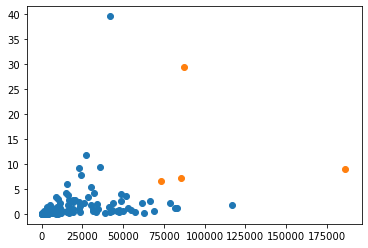

In [36]:
# Plot data
plt.scatter(df_non_outliers['2018 gdp per capita'],
               df_non_outliers['tourists_per_capita'])
plt.scatter(df_outliers['2018 gdp per capita'],
               df_outliers['tourists_per_capita'])
plt.show()

In [37]:
df_outliers.describe()

,2018 gdp per capita,tourists_2018,pop_2018,tourists_per_capita
count,4.000000,4.000000e+00,4.000000,4.000000
mean,107870.886287,5.411700e+06,271803.250000,13.027048
std,52357.866726,8.768756e+06,278975.932591,10.879043
min,72968.704230,3.470000e+05,38682.000000,6.644912
25%,82350.141315,4.340000e+05,57801.000000,7.072298
50%,86342.911460,1.403400e+06,208447.500000,8.092670
75%,111863.656433,6.381100e+06,422449.750000,14.047420
max,185829.018000,1.849300e+07,631636.000000,29.277939


In [39]:
df_tourists_per_cap.to_excel('df_outliers.xlsx')